# Pixel Intensity-Based Colocalization

<div class="custom-button-row">
    <a 
        class="custom-button custom-download-button" href="../../../notebooks/08_colocalization/pixel_intensity_based_colocalization.ipynb" download>
        <i class="fas fa-download"></i> Download this Notebook
    </a>
    <a
    class="custom-button custom-download-button" href="https://colab.research.google.com/github/HMS-IAC/bobiac/blob/gh-pages/colab_notebooks/08_colocalization/pixel_intensity_based_colocalization.ipynb" target="_blank">
        <img class="button-icon" src="../../../_static/logo/icon-google-colab.svg" alt="Open in Colab">
        Open in Colab
    </a>
</div>

In [76]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "scikit-image",
#     "scipy",
#     "tifffile",
#     "imagecodecs",
# ]
# ///

In [77]:
import matplotlib.pyplot as plt
import ndv
import numpy as np
import tifffile
from scipy.stats import pearsonr
from skimage.filters import threshold_otsu

In [78]:
img_path = "../../_static/images/coloc/14na_z4.tif"
# img_path = "../../_static/images/coloc/14na_z4_nuc.tif"
img = tifffile.imread(img_path)

In [22]:
ndv.imshow(img)

RFBOutputContext()

<IPython.core.display.Javascript object>

In [23]:
viewer = ndv.imshow(img)

RFBOutputContext()

<IPython.core.display.Javascript object>


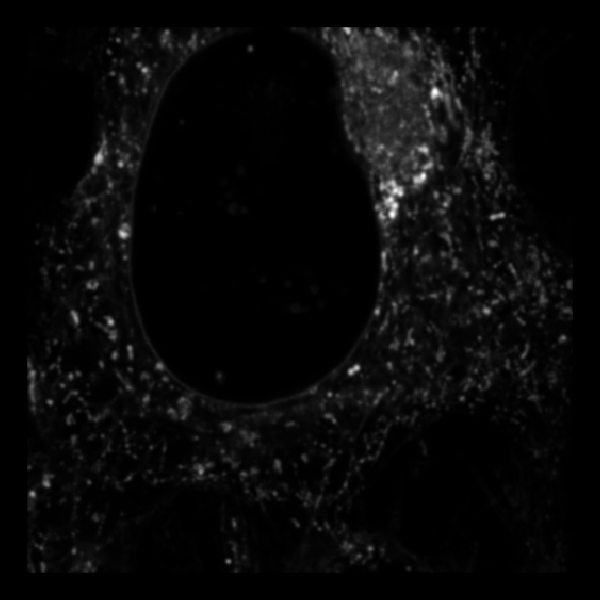

In [24]:
viewer.widget().children[1].snapshot()

In [79]:
ch1 = img[0]
ch2 = img[1]

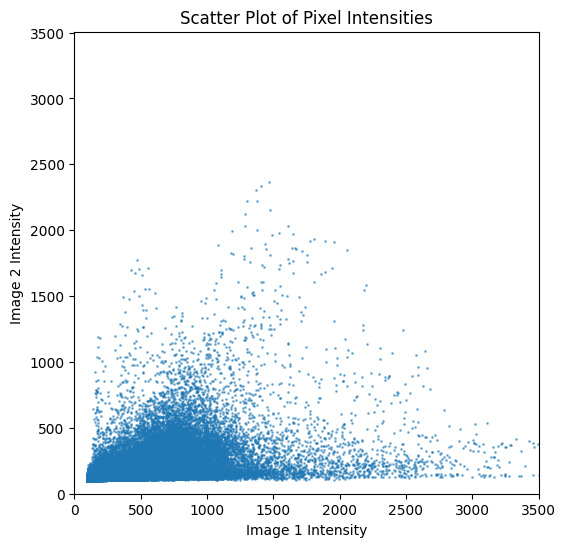

In [67]:
# plot scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(ch1.flatten(), ch2.flatten(), s=1, alpha=0.5)
plt.xlabel("Image 1 Intensity")
plt.ylabel("Image 2 Intensity")
plt.title("Scatter Plot of Pixel Intensities")
# set both axes to the same range based on the maximum value
max_intensity = max(ch1.max(), ch2.max())
plt.xlim(0, max_intensity)
plt.ylim(0, max_intensity)
plt.show()

<!-- <div align="center"> <img src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/coloc/pearsons.png" alt="Ilastik Logo" width="600"></div> -->
<div align="left"> <img src="../../_static/images/coloc/pearsons.png" alt="Ilastik Logo" width="600"></div>

In [75]:
mean_ch1 = np.mean(ch1)
mean_ch2 = np.mean(ch2)

numerator = np.sum((ch1 - mean_ch1) * (ch2 - mean_ch2))
denominator = np.sqrt(np.sum((ch1 - mean_ch1) ** 2) * np.sum((ch2 - mean_ch2) ** 2))
prs = numerator / denominator
print(f"Pearson's correlation coefficient: {prs:.4f}")

pearson, p_value = pearsonr(ch1.flatten(), ch2.flatten())
print(
    f"Pearson's correlation coefficient (scipy): {pearson:.4f}, p-value: {p_value:.4f}"
)

Pearson's correlation coefficient: 0.5383
Pearson's correlation coefficient (scipy): 0.5383, p-value: 0.0000


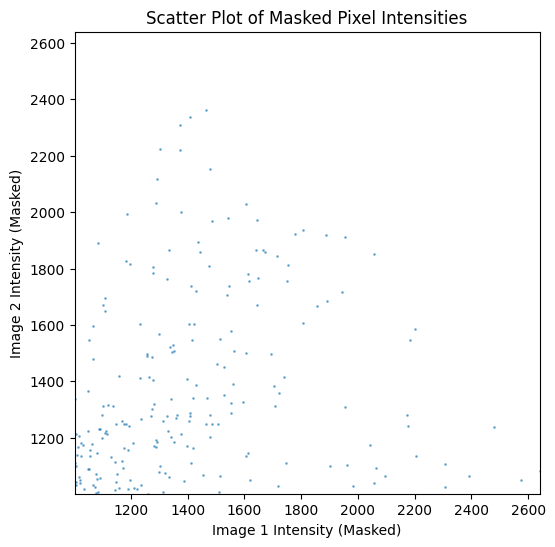

Pearson's correlation coefficient (masked): 0.1494
Pearson's correlation coefficient (masked, scipy): 0.1494, p-value: 0.0293


In [87]:
# calculate pearsons on thresholded images

# image_1_mask = ch1 > threshold_otsu(ch1)
# image_2_mask = ch2 > threshold_otsu(ch2)
image_1_mask = ch1 > 1000
image_2_mask = ch2 > 1000

# get the overlap mask
overlap_mask = image_1_mask & image_2_mask

# extract intensity from channel 1 only at pixels where both channels overlap
image_1_masked = ch1[overlap_mask]
# extract intensity from channel 2 only at pixels where both channels overlap
image_2_masked = ch2[overlap_mask]

# plot scatter plot for masked images
plt.figure(figsize=(6, 6))
plt.scatter(image_1_masked.flatten(), image_2_masked.flatten(), s=1, alpha=0.5)
plt.xlabel("Image 1 Intensity (Masked)")
plt.ylabel("Image 2 Intensity (Masked)")
plt.title("Scatter Plot of Masked Pixel Intensities")
# set both axes to the same range based on the maximum value of the masked images
max_intensity_masked = max(image_1_masked.max(), image_2_masked.max())
min_intensity_masked = min(image_1_masked.min(), image_2_masked.min())
plt.xlim(min_intensity_masked, max_intensity_masked)
plt.ylim(min_intensity_masked, max_intensity_masked)
plt.show()

mean_ch1_masked = np.mean(image_1_masked)
mean_ch2_masked = np.mean(image_2_masked)

numerator_masked = np.sum(
    (image_1_masked - mean_ch1_masked) * (image_2_masked - mean_ch2_masked)
)
denominator_masked = np.sqrt(
    np.sum((image_1_masked - mean_ch1_masked) ** 2)
    * np.sum((image_2_masked - mean_ch2_masked) ** 2)
)
prs_masked = numerator_masked / denominator_masked
print(f"Pearson's correlation coefficient (masked): {prs_masked:.4f}")

# Verify with scipy's pearsonr on the same masked data
pearson_masked_scipy, p_value_masked = pearsonr(image_1_masked, image_2_masked)
print(
    f"Pearson's correlation coefficient (masked, scipy): {pearson_masked_scipy:.4f}, p-value: {p_value_masked:.4f}"
)

Mander's is extremely sensitive to thresholding, so the way you decide to threshold your images will have a large impact on the results.

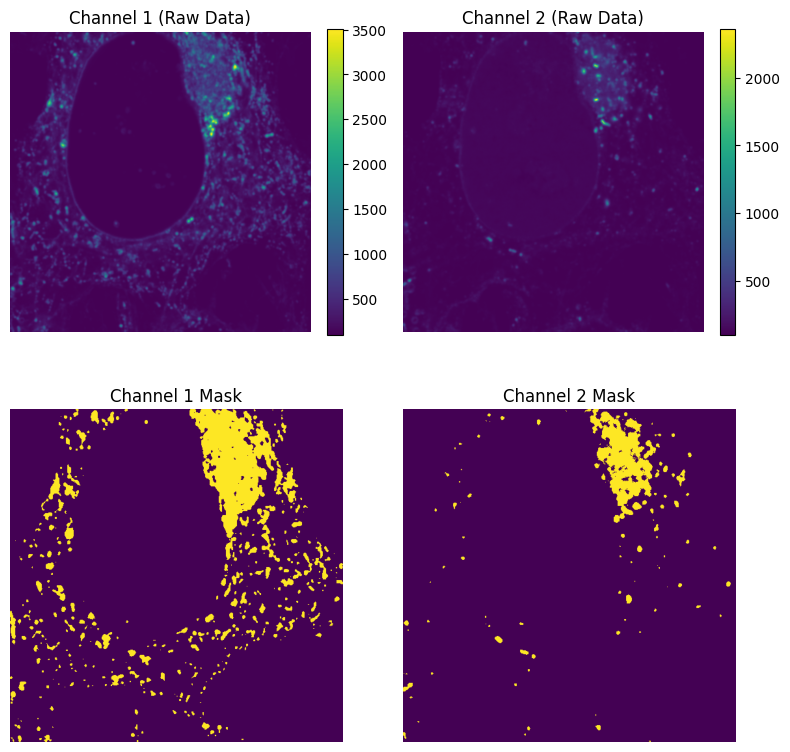

In [86]:
# create binary masks based on thresholds
image_1_mask = ch1 > threshold_otsu(ch1)
image_2_mask = ch2 > threshold_otsu(ch2)

# plot raw data and masks in a 2x2 subplot
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Raw channel 1
im1 = ax[0, 0].imshow(ch1)
ax[0, 0].set_title("Channel 1 (Raw Data)")
ax[0, 0].axis("off")
plt.colorbar(im1, ax=ax[0, 0], fraction=0.046)

# Raw channel 2
im2 = ax[0, 1].imshow(ch2)
ax[0, 1].set_title("Channel 2 (Raw Data)")
ax[0, 1].axis("off")
plt.colorbar(im2, ax=ax[0, 1], fraction=0.046)

# Channel 1 mask
ax[1, 0].imshow(image_1_mask)
ax[1, 0].set_title("Channel 1 Mask")
ax[1, 0].axis("off")

# Channel 2 mask
ax[1, 1].imshow(image_2_mask)
ax[1, 1].set_title("Channel 2 Mask")
ax[1, 1].axis("off")

plt.tight_layout()
plt.show()

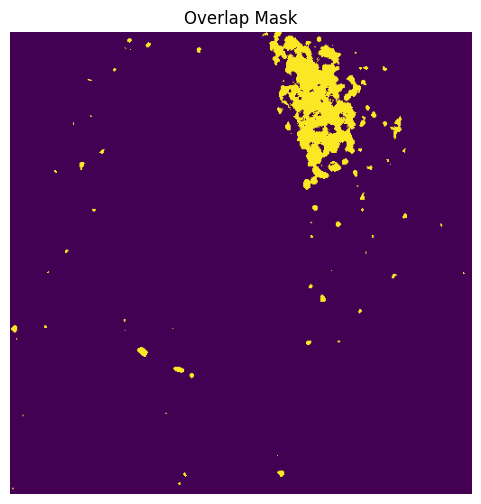

In [71]:
# only consider pixels within the mask (keep intensities above threshold, zero elsewhere)
ch1_tr = np.where(image_1_mask, ch1, 0)
ch2_tr = np.where(image_2_mask, ch2, 0)

# get the overlap mask
overlap_mask = image_1_mask & image_2_mask

# plot overlap mask
plt.figure(figsize=(6, 6))
plt.imshow(overlap_mask)
plt.title("Overlap Mask")
plt.axis("off")
plt.show()

<!-- <div align="center"> <img src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/coloc/manders.png" alt="Ilastik Logo" width="600"></div> -->
<div align="left"> <img src="../../_static/images/coloc/manders.png" alt="Ilastik Logo" width="600"></div>

In [64]:
# extract intensity from channel 1 only at pixels where both channels overlap
ch1_overlap_with_ch2 = ch1[overlap_mask]
# extract intensity from channel 2 only at pixels where both channels overlap
ch2_overlap_with_ch1 = ch2[overlap_mask]

# calculate the sum of the masked images
sum_ch1_tr = np.sum(ch1_tr)
sum_ch2_tr = np.sum(ch2_tr)

# calculate the Manders coefficients
M1 = np.sum(ch1_overlap_with_ch2) / sum_ch1_tr
M2 = np.sum(ch2_overlap_with_ch1) / sum_ch2_tr

print(f"Manders coefficient M1: {M1:.4f}")
print(f"Manders coefficient M2: {M2:.4f}")

Manders coefficient M1: 0.3531
Manders coefficient M2: 0.8980


In [65]:
# # USE NUMPY WHERE TO GET OVERLAP INTENSITIES

# # only consider pixels within the mask (keep intensities above threshold, zero elsewhere)
# ch1_tr = np.where(image_1_mask, ch1, 0)
# ch2_tr = np.where(image_2_mask, ch2, 0)

# # find overlapping regions
# # use intensity values from ch1 (above threshold) ONLY where ch2 > 0
# ch1_overlap_with_ch2 = np.where(image_2_mask, ch1_tr, 0)
# # use intensity values from ch2 (above threshold) ONLY where ch1 > 0
# ch2_overlap_with_ch1 = np.where(image_1_mask, ch2_tr, 0)

# # calculate the sum of the masked images
# sum_ch1_tr = np.sum(ch1_tr)
# sum_ch2_tr = np.sum(ch2_tr)

# # calculate the Manders coefficients
# M1 = np.sum(ch1_overlap_with_ch2) / sum_ch1_tr
# M2 = np.sum(ch2_overlap_with_ch1) / sum_ch2_tr

# print(f"Manders coefficient M1: {M1:.4f}")
# print(f"Manders coefficient M2: {M2:.4f}")